# 第十九课 使用Decision Tree建模with Gini and Entropy


Python零基础学习建模：https://www.ixigua.com/home/77346806707?utm_source=xiguastudio

Python源文件及数据下载链接: https://pan.baidu.com/s/1yuNlG6u9_C31fzhzbzqASA 提取码: ebrh


In [34]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline

In [37]:
data=sns.load_dataset('iris')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
data.shape

(150, 5)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [40]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [41]:
X = data.drop(['species'], axis=1)
y = data['species']

In [42]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
cls_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
cls_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [44]:
cls_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [45]:
cls_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [46]:
y_pred_gini = cls_gini.predict(X_test)
y_pred_gini

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa'], dtype=object)

In [47]:
y_pred_entropy = cls_entropy.predict(X_test)
y_pred_entropy

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa'], dtype=object)

In [48]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))
# y_pred_gini are the predicted class labels in the test-set.

Model accuracy score with criterion gini index: 1.0000


In [49]:
#from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_entropy)))
# y_pred_entropy are the predicted class labels in the test-set.

Model accuracy score with criterion entropy index: 0.9778


In [50]:
#Check for overfitting and underfitting:
print('Training set score: {:.4f}'.format(cls_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(cls_gini.score(X_test, y_test)))

Training set score: 0.9524
Test set score: 1.0000


In [51]:
print('Training set score: {:.4f}'.format(cls_entropy.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(cls_entropy.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9778


[Text(251.10000000000002, 380.52, 'X[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(167.4, 271.8, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(334.8, 271.8, 'X[2] <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(167.4, 163.07999999999998, 'X[3] <= 1.6\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(502.20000000000005, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(418.5, 54.360000000000014, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(585.9, 54.360000000000014, 'gini = 0.059\nsamples = 33\nvalue = [0, 1, 32]')]

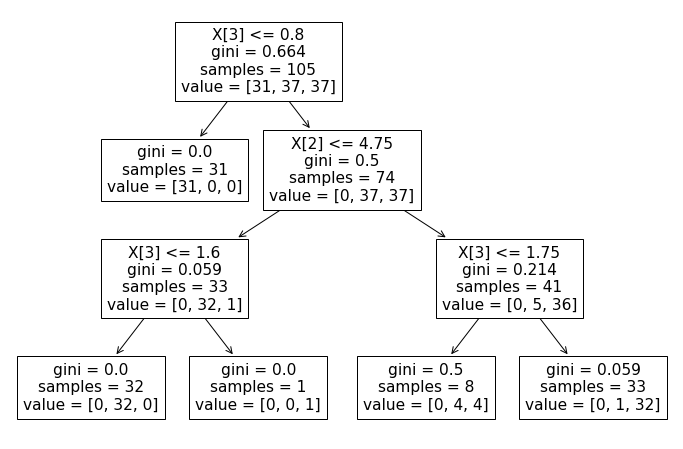

In [53]:
#Plot decision tree:
plt.figure(figsize=(12,8))
tree.plot_tree(cls_gini.fit(X_train, y_train))

[Text(223.20000000000002, 407.7, 'X[3] <= 0.8\nentropy = 1.58\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(148.8, 353.34000000000003, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(297.6, 353.34000000000003, 'X[2] <= 4.75\nentropy = 1.0\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(148.8, 298.98, 'X[3] <= 1.6\nentropy = 0.196\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(74.4, 244.62, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(223.20000000000002, 244.62, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(446.40000000000003, 298.98, 'X[2] <= 5.15\nentropy = 0.535\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(372.0, 244.62, 'X[3] <= 1.75\nentropy = 0.918\nsamples = 15\nvalue = [0, 5, 10]'),
 Text(223.20000000000002, 190.26, 'X[1] <= 2.35\nentropy = 0.918\nsamples = 6\nvalue = [0, 4, 2]'),
 Text(148.8, 135.89999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(297.6, 135.89999999999998, 'X[2] <= 5.05\nentropy = 0.722\nsamples = 5\nvalue = [0, 4, 1]

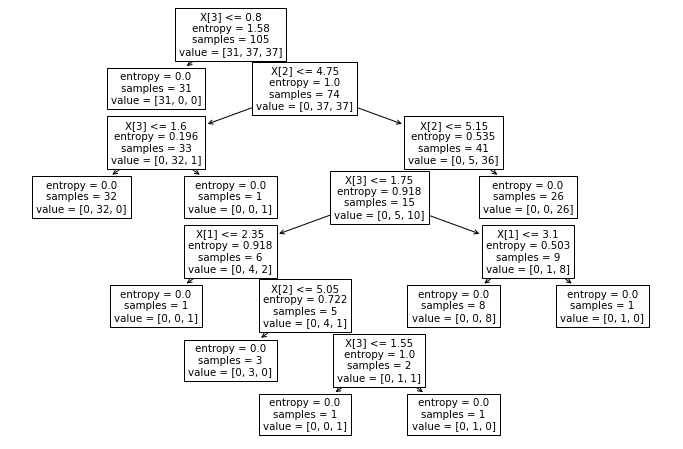

In [36]:
#Plot decision tree:
plt.figure(figsize=(12,8))
tree.plot_tree(cls_entropy.fit(X_train, y_train))